# Analysing loan data from Prosper
## by Aman Kumbhani

## Preliminary Wrangling

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. This [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) explains the variables in the data set. You are not expected to explore all of the variables in the dataset! Focus your exploration on about 10-15 of them.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
df = pd.read_csv('prosperLoanData.csv')
df_copy = df.copy()
df_copy.sample(3)

ListingKey  ListingNumber            ListingCreationDate  \
57906  1BFF3600453834519593115        1165352  2014-01-26 13:09:35.317000000   
12912  9D25353769074590952CF49         555031  2012-01-29 09:13:39.340000000   
29031  A0293365711350325D22F97          25088  2006-07-17 10:18:55.230000000   

      CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
57906         NaN    36    Current                  NaN      0.17611   
12912         NaN    36  Completed  2012-04-12 00:00:00      0.06828   
29031           D    36  Defaulted  2007-11-17 00:00:00      0.22744   

       BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
57906        0.1400       0.1300  ...          -16.44                0.0   
12912        0.0649       0.0549  ...           -2.97                0.0   
29031        0.2200       0.2150  ...          -10.54                0.0   

       LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
57906                   0.00                 0.00   
12912                   0.00                 0.00   
29031                1972.34              1972.34   

      LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
57906                             0.0            1.0                0   
12912                             0.0            1.0                0   
29031                             0.0            1.0                0   

      InvestmentFromFriendsCount InvestmentFromFriendsAmount Investors  
57906                          0                         0.0         1  
12912                          0                         0.0        53  
29031                          0                         0.0        27  

[3 rows x 81 columns]

In [4]:
df_copy.shape

(113937, 81)

In [5]:
df_copy.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

### What is the structure of your dataset?

The dataset above contains 113937 observations and 81 features.

### What is/are the main feature(s) of interest in your dataset?

The features that could be of use are;
- ListingKey: Unique key for each listing, same value as the 'key' used in the listing object in the API
- ListingCreationDate: The date the listing was created
- Term: The length of the loan expressed in months
- LoanStatus: The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket
- BorrowerRate: The Borrower's interest rate for this loan
- ProsperRating (Alpha): The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009
- ListingCategory: The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
- BorrowerState: The two letter abbreviation of the state of the address of the borrower at the time the Listing was created
- Occupation: The Occupation selected by the Borrower at the time they created the listing
- EmploymentStatus: The employment status of the borrower at the time they posted the listing
- IsBorrowerHomeowner: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner
- IncomeRange: The income range of the borrower at the time the listing was created
- StatedMonthlyIncome: The monthly income the borrower stated at the time the listing was created
- Recommendations: Number of recommendations the borrower had at the time the listing was created
- Investors: The number of investors that funded the loan.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
Features like Recommendations, IncomeRange, EmploymentStatus & IsBorrowerHomeowner will affect is an individual is granted a loan.

In [6]:
# Creating a list of column names which will be used for analysis
col_used = ['ListingKey', 'ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)',
           'BorrowerState', 'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeRange', 'StatedMonthlyIncome',
           'Recommendations', 'Investors', 'LoanOriginalAmount']
df_copy = df_copy[col_used]
df_copy.sample(2)

ListingKey            ListingCreationDate  Term  \
31980  72DF3461935149385B898EB  2009-08-31 10:36:05.817000000    36   
22476  C99E3582676123740DF78C7  2013-06-17 17:34:57.763000000    36   

      LoanStatus  BorrowerRate ProsperRating (Alpha)  \
31980  Completed        0.1520                     A   
22476    Current        0.1203                     A   

       ListingCategory (numeric) BorrowerState    Occupation EmploymentStatus  \
31980                          1            MI    Nurse (RN)        Full-time   
22476                          1            KY  Professional         Employed   

       IsBorrowerHomeowner     IncomeRange  StatedMonthlyIncome  \
31980                 True  $50,000-74,999          4978.333333   
22476                 True       $100,000+         10416.666667   

       Recommendations  Investors  LoanOriginalAmount  
31980                1        203                8500  
22476                0          1                7000

In [7]:
# Rename column names to make it simpler for analysis
df_copy.rename(columns = {'ProsperRating (Alpha)' : 'ProsperRatingA',
                          'ListingCategory (numeric)' : 'ListingCategoryN',
                          'Recommendations' : 'Recom'}, inplace=True)
df_copy.sample(2)

ListingKey            ListingCreationDate  Term  \
29637  B8D833691277001600AC41A  2006-09-22 14:07:16.740000000    36   
52840  6661359668993504005946F  2013-12-16 14:41:07.893000000    60   

      LoanStatus  BorrowerRate ProsperRatingA  ListingCategoryN BorrowerState  \
29637  Completed        0.1500            NaN                 0            FL   
52840    Current        0.1905              C                 1            MT   

              Occupation EmploymentStatus  IsBorrowerHomeowner  \
29637  Military Enlisted    Not available                False   
52840            Analyst         Employed                 True   

          IncomeRange  StatedMonthlyIncome  Recom  Investors  \
29637   Not displayed          4166.666667      0         35   
52840  $50,000-74,999          4241.666667      0          1   

       LoanOriginalAmount  
29637                3000  
52840               15000

In [8]:
# Fixing null values
df_copy.dropna(inplace=True)

In [9]:
# Looking at datatypes
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83520 entries, 1 to 113936
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ListingKey           83520 non-null  object 
 1   ListingCreationDate  83520 non-null  object 
 2   Term                 83520 non-null  int64  
 3   LoanStatus           83520 non-null  object 
 4   BorrowerRate         83520 non-null  float64
 5   ProsperRatingA       83520 non-null  object 
 6   ListingCategoryN     83520 non-null  int64  
 7   BorrowerState        83520 non-null  object 
 8   Occupation           83520 non-null  object 
 9   EmploymentStatus     83520 non-null  object 
 10  IsBorrowerHomeowner  83520 non-null  bool   
 11  IncomeRange          83520 non-null  object 
 12  StatedMonthlyIncome  83520 non-null  float64
 13  Recom                83520 non-null  int64  
 14  Investors            83520 non-null  int64  
 15  LoanOriginalAmount   83520 non-null

In [10]:
# Fixing ListingCreationDate to datetime instead of object 
df_copy['ListingCreationDate'] = pd.to_datetime(df_copy['ListingCreationDate'])

In [11]:
###### Fixing Term into categorical datatype
df_copy['Term'] = df_copy['Term'].astype('category')
df_copy['Term'].value_counts()

36    57621
60    24286
12     1613
Name: Term, dtype: int64

In [12]:
# Testing 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83520 entries, 1 to 113936
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ListingKey           83520 non-null  object        
 1   ListingCreationDate  83520 non-null  datetime64[ns]
 2   Term                 83520 non-null  category      
 3   LoanStatus           83520 non-null  object        
 4   BorrowerRate         83520 non-null  float64       
 5   ProsperRatingA       83520 non-null  object        
 6   ListingCategoryN     83520 non-null  int64         
 7   BorrowerState        83520 non-null  object        
 8   Occupation           83520 non-null  object        
 9   EmploymentStatus     83520 non-null  object        
 10  IsBorrowerHomeowner  83520 non-null  bool          
 11  IncomeRange          83520 non-null  object        
 12  StatedMonthlyIncome  83520 non-null  float64       
 13  Recom                83520 non

In [13]:
# To make use of ProsperRatingA feature, we need to only have entries post July 2009.
df_copy = df_copy.query('ListingCreationDate > "2009-08-01"')
df_copy.sample(5)

ListingKey     ListingCreationDate Term LoanStatus  \
29389  C3E9359436279198487B119 2013-11-07 06:12:48.300   36    Current   
33744  CA2E35898036039014F3C42 2013-09-10 16:14:30.963   60    Current   
29539  B8C6354947026287980585F 2012-06-18 09:16:42.453   36  Completed   
37582  4B3336010098728714EAA12 2014-01-28 12:29:18.313   60    Current   
14446  93A3358904085983492223D 2013-09-04 14:38:08.083   60    Current   

       BorrowerRate ProsperRatingA  ListingCategoryN BorrowerState  \
29389        0.1249              A                 1            CA   
33744        0.1730              C                 1            TX   
29539        0.2499              D                 1            FL   
37582        0.1970              C                 1            NC   
14446        0.1519              B                 1            AZ   

               Occupation EmploymentStatus  IsBorrowerHomeowner  \
29389      Sales - Retail         Employed                 True   
33744   Military Enlisted         Employed                 True   
29539           Executive         Employed                 True   
37582  Sales - Commission         Employed                False   
14446        Truck Driver         Employed                 True   

          IncomeRange  StatedMonthlyIncome  Recom  Investors  \
29389       $100,000+         25000.000000      0          1   
33744  $50,000-74,999          6240.000000      0          1   
29539       $100,000+          9250.000000      0         58   
37582  $25,000-49,999          3333.333333      0          1   
14446  $25,000-49,999          3750.000000      0          1   

       LoanOriginalAmount  
29389               20000  
33744               15000  
29539                5000  
37582               10000  
14446                5000

In [14]:
# Test
df_copy.query('ListingCreationDate < "2009-08-01"')

Empty DataFrame
Columns: [ListingKey, ListingCreationDate, Term, LoanStatus, BorrowerRate, ProsperRatingA, ListingCategoryN, BorrowerState, Occupation, EmploymentStatus, IsBorrowerHomeowner, IncomeRange, StatedMonthlyIncome, Recom, Investors, LoanOriginalAmount]
Index: []

## Univariate Exploration

In [15]:
df_copy['IsBorrowerHomeowner'].value_counts()

True     44139
False    39200
Name: IsBorrowerHomeowner, dtype: int64

In [16]:
df_copy['IncomeRange'].value_counts()

$50,000-74,999    25227
$25,000-49,999    23518
$100,000+         15150
$75,000-99,999    14372
$1-24,999          4382
Not employed        647
$0                   43
Name: IncomeRange, dtype: int64

In [17]:
df_copy['ProsperRatingA'].value_counts()

C     17914
B     15314
A     14296
D     14056
E      9607
HR     6867
AA     5285
Name: ProsperRatingA, dtype: int64

In [18]:
ProsperRating_Alpha_classes = ['AA','A', 'B', 'C', 'D', 'E', 'HR']
IncomeRange_classes = ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
pd_ver = pd.__version__.split(".")

if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = ProsperRating_Alpha_classes)
    df_copy['ProsperRatingA'] = df_copy['ProsperRatingA'].astype(vclasses)
    vclasses_1 = pd.api.types.CategoricalDtype(ordered = True, categories = IncomeRange_classes)
    df_copy['IncomeRange'] = df_copy['IncomeRange'].astype(vclasses_1)
else: # compatibility for v.20
    df_copy['ProsperRatingA'] = df_copy['ProsperRatingA'].astype('category', ordered = True,
                                                     categories = ProsperRating_Alpha_classes)
    df_copy['IncomeRange'] = df_copy['IncomeRange'].astype('category', ordered = True,
                                                     categories = IncomeRange_classes)

In [19]:
df_copy['ListingCategoryN'].value_counts()

1     51976
7      9085
2      6742
3      5281
6      2220
13     1975
15     1500
18      880
14      865
20      769
19      758
16      304
5       263
11      217
8       199
10       91
9        85
12       58
17       51
0        20
Name: ListingCategoryN, dtype: int64

In [20]:
df_copy.LoanStatus.value_counts()

Current                   55272
Completed                 19488
Chargedoff                 5326
Defaulted                   997
Past Due (1-15 days)        798
Past Due (31-60 days)       358
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       264
FinalPaymentInProgress      203
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

__1. What is the Loan Status Counts for all borrowers?__

Text(0.5, 1.0, 'Loan Status Counts')

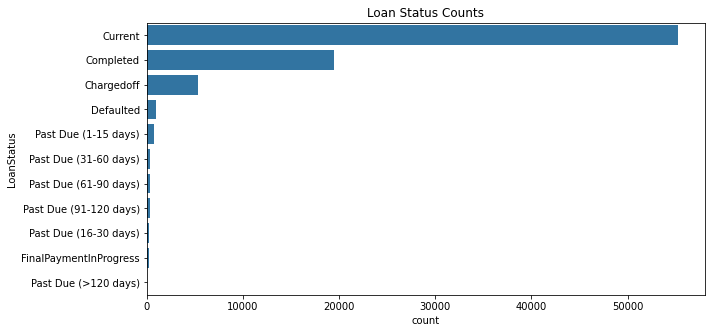

In [21]:
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
sb.countplot(data=df_copy, y=df_copy['LoanStatus'], order=df_copy.LoanStatus.value_counts().index, color=base_color)
plt.title('Loan Status Counts')

__Observation__ - The maximum count for majority of the borrows is of the status current. This means that the loan is still on going.

__2. What is the most common income range?__

Text(0.5, 1.0, 'Common Income Ranges')

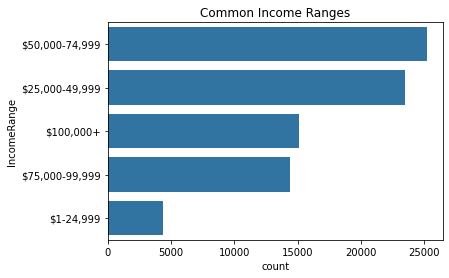

In [22]:
sb.countplot(data=df_copy, y=df_copy.IncomeRange, order=df_copy.IncomeRange.value_counts().index, color=base_color);
plt.title('Common Income Ranges')

__Observation__ - It is seen that the most common income range is $\$25000-$\$50000.

__3. Most common prosper ratings?__

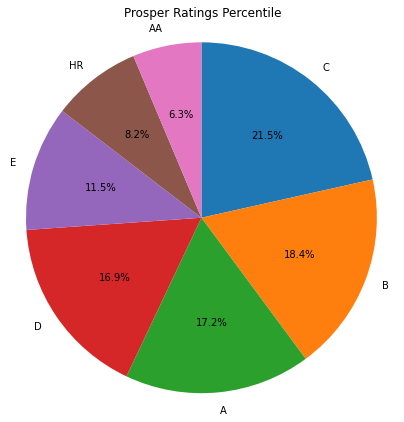

In [23]:
plt.figure(figsize = [7, 10])
plt.pie(df_copy.ProsperRatingA.value_counts(), labels = df_copy.ProsperRatingA.value_counts().index, startangle = 90,
        counterclock = False, autopct   = '%.1f%%');
plt.title("Prosper Ratings Percentile")
plt.axis('square');

__Observation__ - As seen above, the ProsperRating C is the most commonly appearing rating in the dataset.

__4. Which state has the highest borrowers?__

Text(0.5, 1.0, 'Top 10 States with the highest number of borrowers')

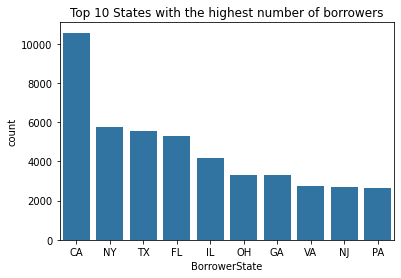

In [24]:
sb.countplot(data=df_copy, x=df_copy.BorrowerState, order=df_copy.BorrowerState.value_counts().index[0:10], color=base_color)
plt.title('Top 10 States with the highest number of borrowers')

__Observation__ - We observe that the highest number of borrowers are from the state of California (CA).

5. __What is the Stated Monthly Income for borrowers?__

Text(0, 0.5, 'Count')

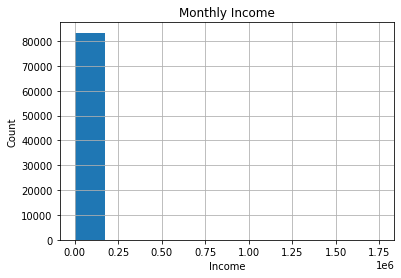

In [25]:
df_copy.StatedMonthlyIncome.hist()
plt.title('Monthly Income')
plt.xlabel('Income')
plt.ylabel('Count')

The above does not show the variation in the monthly income. We can thus use only the most common counts income which is under the 25000 mark.

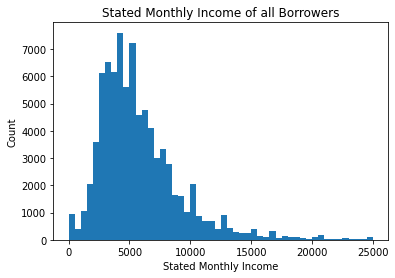

In [26]:
df_loan_copy = df_copy[df_copy['StatedMonthlyIncome'] <= 25000]
bins = np.arange(0, df_loan_copy['StatedMonthlyIncome'].max()+500, 500)
plt.hist(data = df_copy, x = 'StatedMonthlyIncome', bins = bins);
plt.xlabel('Stated Monthly Income');
plt.ylabel('Count');
plt.title("Stated Monthly Income of all Borrowers");

__Observation__ - The most common stated monthly income ranges from $\$3000 - $\$7500.  

## Bivariate Exploration


__1. Does the Income Range affect Loan Amount?__

In [27]:
df_copy.columns

Index(['ListingKey', 'ListingCreationDate', 'Term', 'LoanStatus',
       'BorrowerRate', 'ProsperRatingA', 'ListingCategoryN', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeRange',
       'StatedMonthlyIncome', 'Recom', 'Investors', 'LoanOriginalAmount'],
      dtype='object')

Text(0.5, 1.0, 'Income Range Versus Loan Amount')

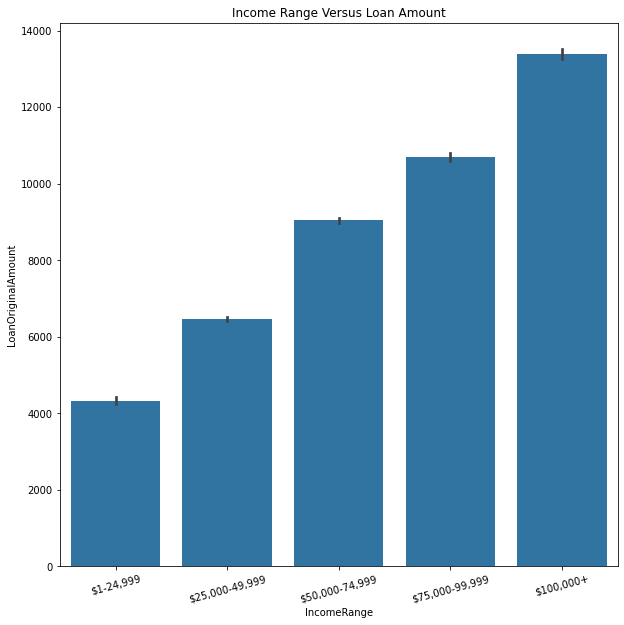

In [28]:
plt.figure(figsize=[10,10])
ax1 = sb.barplot(data = df_copy, x = 'IncomeRange', y = 'LoanOriginalAmount', color = base_color)
plt.xticks(rotation = 15);
plt.title('Income Range Versus Loan Amount')

__Observation__ - As seen above, the loan amount range is more as the Income range increases for each category.

__2. Does employment status affect loan amount?__

Text(0.5, 1.0, 'Employment Status Versus Loan Amount')

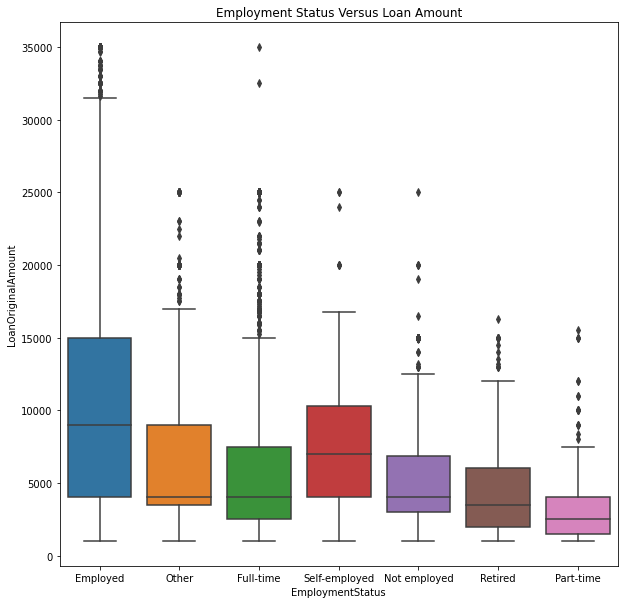

In [29]:
plt.figure(figsize=[10,10])
sb.boxplot(y=df_copy.LoanOriginalAmount, x=df_copy.EmploymentStatus)
plt.title('Employment Status Versus Loan Amount')

__Observation__ - As seen above, the loan amount handed to borrowers who are employed is much more than the others.

__3. Count of applicants with respect to income & home owner status.__

Text(0.5, 1.0, 'Counts of applicants for income range with respect to home owning status')

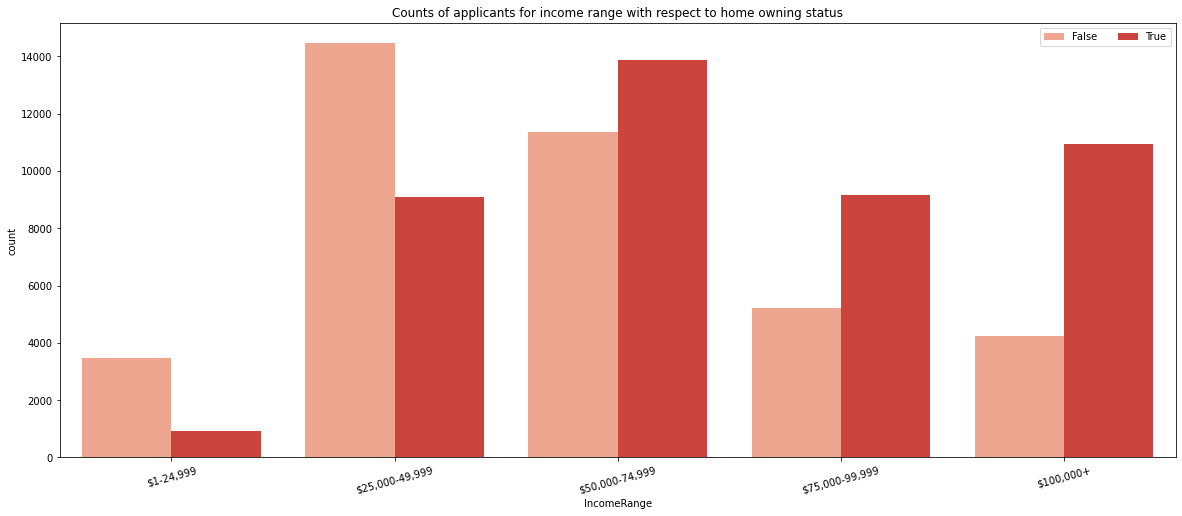

In [30]:
plt.figure(figsize=[20,8])
sb.countplot(data = df_copy, x = df_copy['IncomeRange'], hue = 'IsBorrowerHomeowner', palette = 'Reds')
plt.legend(ncol = 2) # re-arrange legend to reduce overlapping
plt.xticks(rotation = 15)
plt.title('Counts of applicants for income range with respect to home owning status')

__Observation__ - We can see that the application counts are the maximum for income range 50000 to 75000 dollars for applicants owning a home, whereas it is maximum for income range 25000 to 50000 dollars for applicants not owning a home.

We can see from the visualizations above that the amount of loan has a relation with the employment status. We also saw that higher the income range, the higher is the loan amount. These features play an important role in determining the loan granting parameters.

## Multivariate Exploration

__1. Comparing Borrower Rate with Income Range for whether or not the borrower owns a house.__

Text(0.5, 1.0, 'Borrower Rates Versus Income Range for Home Owners')

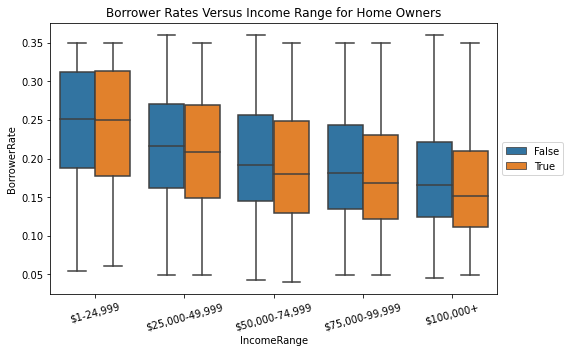

In [31]:
plt.figure(figsize=[8,5])
df_copy_sub = df_copy.loc[df_copy['IsBorrowerHomeowner'].isin(['0', '1'])]
sb.boxplot(data = df_copy_sub, x = 'IncomeRange', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
plt.xticks(rotation = 15)
plt.title('Borrower Rates Versus Income Range for Home Owners')

__Observation__ - It can be seen that for lower income range, the borrorwer rate for the applicant is much higher for both, has a home or not. However, as the income range increases, the borrower rate tends to decrease and is slightly lower for applicants owning a home. 

__2. Compare the Loan amount with employment status for applicants with or without owned home__.

Text(0.5, 1.0, 'Loan Amount Versus Employment Status for Home Owners')

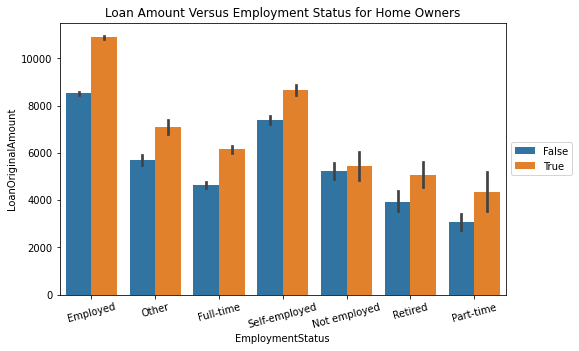

In [32]:
plt.figure(figsize=[8,5])
df_copy_sub = df_copy.loc[df_copy['IsBorrowerHomeowner'].isin(['0', '1'])]
sb.barplot(data = df_copy_sub, x = 'EmploymentStatus', y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
plt.xticks(rotation = 15)
plt.title('Loan Amount Versus Employment Status for Home Owners')

__Observation__ - There is evidence that suggests that employed status & self-employed status have the highest loan amount respectively with a higher amount for applicants owning a house.

__3. Loan amount across Income range & term of loan__.

Text(0.5, 1.0, 'Loan Amount versus Income Range for Term')

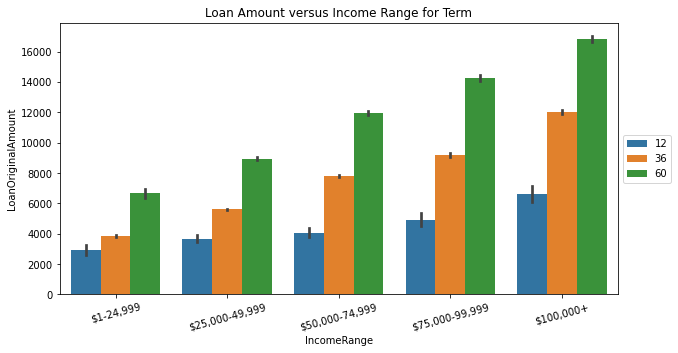

In [33]:
# plotting
plt.figure(figsize=[10,5])
sb.barplot(data = df_copy, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'Term')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
plt.xticks(rotation = 15)
plt.title('Loan Amount versus Income Range for Term')

__Observation__ - The loan amount if higher for applicants with a higher income range and greater loan term. For lower loan term, the loan amount is the lowest for all income ranges.

## Conclusion
We successfully plotted various features against each other to understand what features would be safe to consider a loan. These features include IncomeRange, EmploymentStatus, if applicant is a Home Owner & the prosper rating.
It is best to consider a loan if the applicant has a owned home.